In [51]:
pip install prophet

**https://datafai.com/2018/01/19/950/**

In [0]:
from fbprophet import Prophet
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [53]:
df = sns.load_dataset("flights")
df.head()
df.tail()
df.shape
df.describe()
df.info()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [54]:
data=df.loc[:,['passengers']]
data.head()


,passengers
0,112
1,118
2,132
3,129
4,121


,passengers
0,112
1,118
2,132
3,129
4,121


In [55]:
month = pd.date_range('19490131', periods = 144, freq = 'M')
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [56]:
df['ds']=month
df.head()


,year,month,passengers,ds
0,1949,January,112,1949-01-31
1,1949,February,118,1949-02-28
2,1949,March,132,1949-03-31
3,1949,April,129,1949-04-30
4,1949,May,121,1949-05-31


,year,month,passengers,ds
0,1949,January,112,1949-01-31
1,1949,February,118,1949-02-28
2,1949,March,132,1949-03-31
3,1949,April,129,1949-04-30
4,1949,May,121,1949-05-31


In [57]:
df=df.rename(columns={"passengers":"y"})
df=df.sort_index(axis=1)
df.head()

,ds,month,y,year
0,1949-01-31,January,112,1949
1,1949-02-28,February,118,1949
2,1949-03-31,March,132,1949
3,1949-04-30,April,129,1949
4,1949-05-31,May,121,1949


,ds,month,y,year
0,1949-01-31,January,112,1949
1,1949-02-28,February,118,1949
2,1949-03-31,March,132,1949
3,1949-04-30,April,129,1949
4,1949-05-31,May,121,1949


In [58]:
forcast_my=Prophet(interval_width=0.95)
forcast_my.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
forcast_periods=forcast_my.make_future_dataframe(periods=36,include_history=True,freq='M')
forcast_periods

,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
5,1949-06-30
6,1949-07-31
7,1949-08-31
8,1949-09-30
9,1949-10-31


,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
5,1949-06-30
6,1949-07-31
7,1949-08-31
8,1949-09-30
9,1949-10-31


In [60]:
forcast=forcast_my.predict(forcast_periods)
forcast_One=forcast.loc[:,['ds','yhat']]
forcast_One.head()

,ds,yhat
0,1949-01-31,85.240273
1,1949-02-28,77.585537
2,1949-03-31,110.948382
3,1949-04-30,108.547569
4,1949-05-31,111.819264


,ds,yhat
0,1949-01-31,85.240273
1,1949-02-28,77.585537
2,1949-03-31,110.948382
3,1949-04-30,108.547569
4,1949-05-31,111.819264


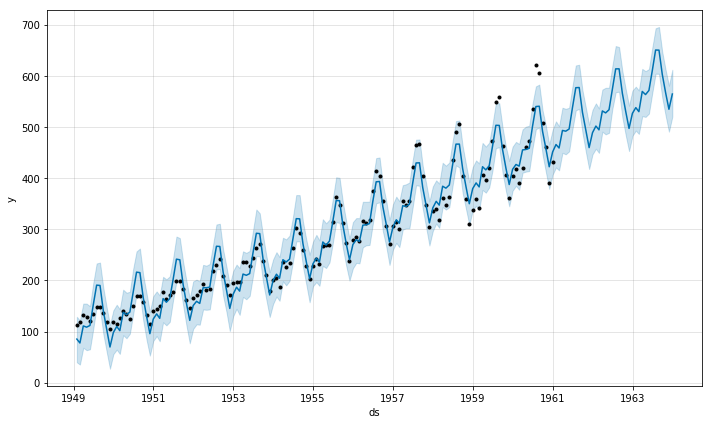

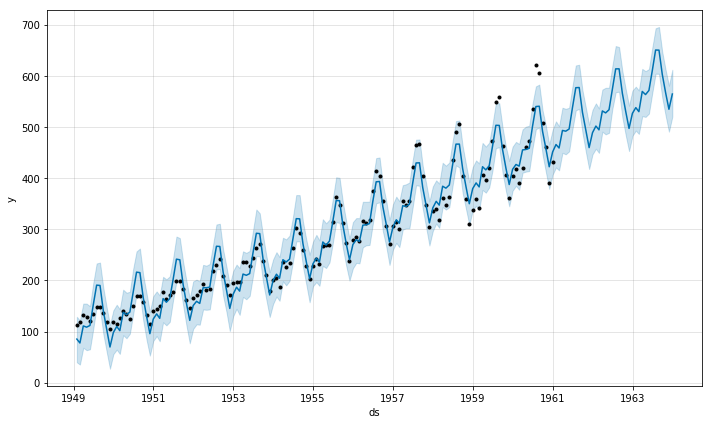

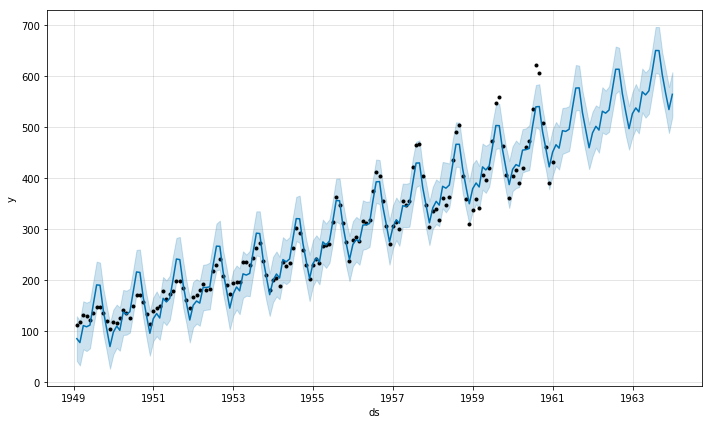

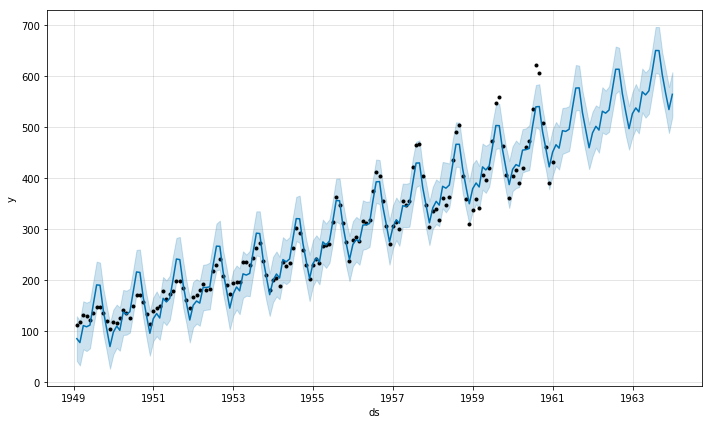

In [61]:
forcast_my.plot(forcast,uncertainty=True)

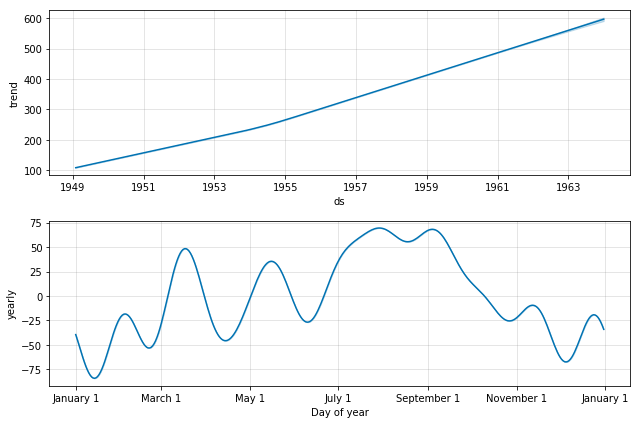

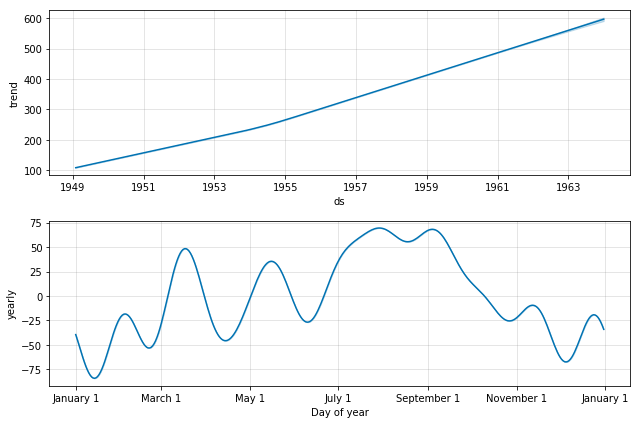

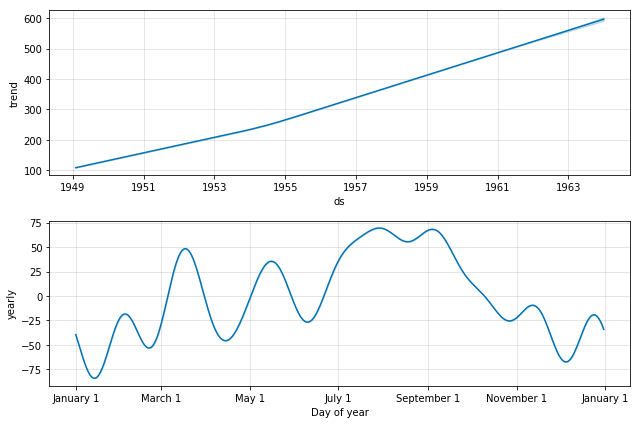

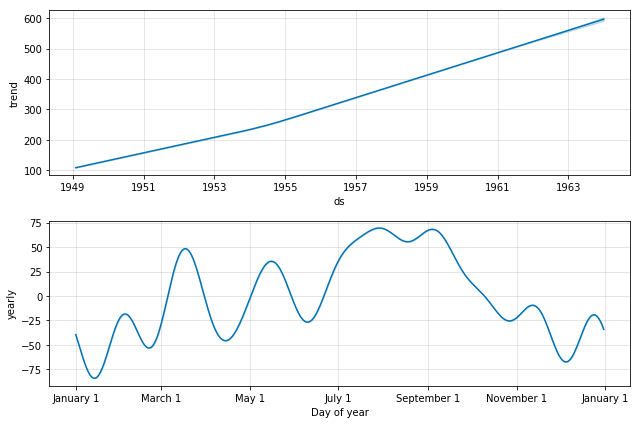

In [62]:
forcast_my.plot_components(forcast)

In [63]:
df_final=pd.merge(forcast_One,df,on='ds',how='inner')
df_final.head()

,ds,yhat,month,y,year
0,1949-01-31,85.240273,January,112,1949
1,1949-02-28,77.585537,February,118,1949
2,1949-03-31,110.948382,March,132,1949
3,1949-04-30,108.547569,April,129,1949
4,1949-05-31,111.819264,May,121,1949


,ds,yhat,month,y,year
0,1949-01-31,85.240273,January,112,1949
1,1949-02-28,77.585537,February,118,1949
2,1949-03-31,110.948382,March,132,1949
3,1949-04-30,108.547569,April,129,1949
4,1949-05-31,111.819264,May,121,1949


In [64]:
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(df_final.yhat,df_final.y),0)

17.0

17.0

In [65]:
df.head()

,ds,month,y,year
0,1949-01-31,January,112,1949
1,1949-02-28,February,118,1949
2,1949-03-31,March,132,1949
3,1949-04-30,April,129,1949
4,1949-05-31,May,121,1949


,ds,month,y,year
0,1949-01-31,January,112,1949
1,1949-02-28,February,118,1949
2,1949-03-31,March,132,1949
3,1949-04-30,April,129,1949
4,1949-05-31,May,121,1949


In [66]:
df.y=np.log(df.y)
df.head()

,ds,month,y,year
0,1949-01-31,January,4.718499,1949
1,1949-02-28,February,4.770685,1949
2,1949-03-31,March,4.882802,1949
3,1949-04-30,April,4.859812,1949
4,1949-05-31,May,4.795791,1949


,ds,month,y,year
0,1949-01-31,January,4.718499,1949
1,1949-02-28,February,4.770685,1949
2,1949-03-31,March,4.882802,1949
3,1949-04-30,April,4.859812,1949
4,1949-05-31,May,4.795791,1949


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,1949-01-31,4.710721
1,1949-02-28,4.709836
2,1949-03-31,4.834695
3,1949-04-30,4.816443
4,1949-05-31,4.815402


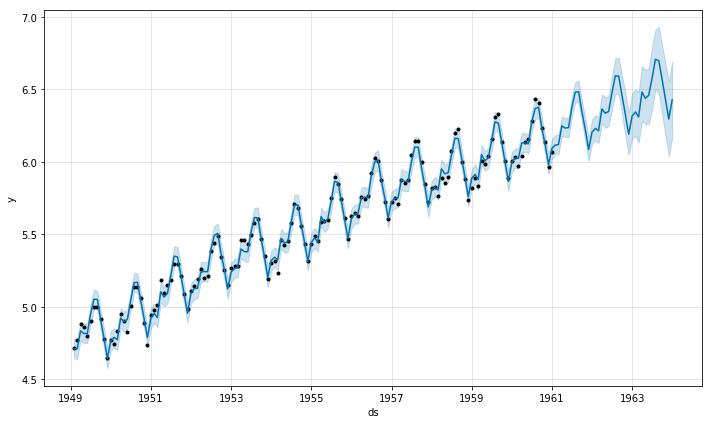

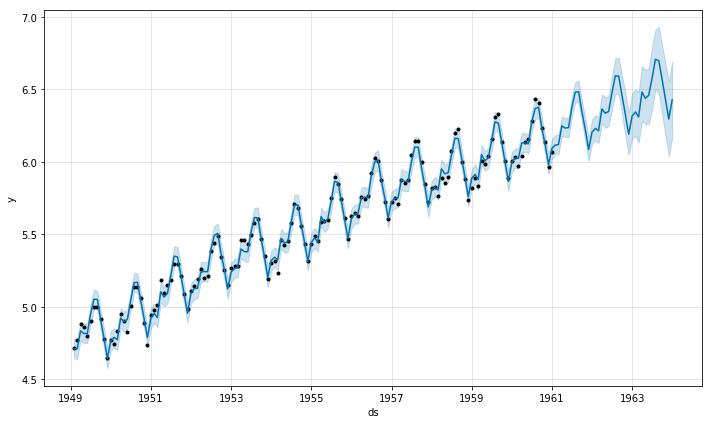

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,1949-01-31,4.710721
1,1949-02-28,4.709836
2,1949-03-31,4.834695
3,1949-04-30,4.816443
4,1949-05-31,4.815402


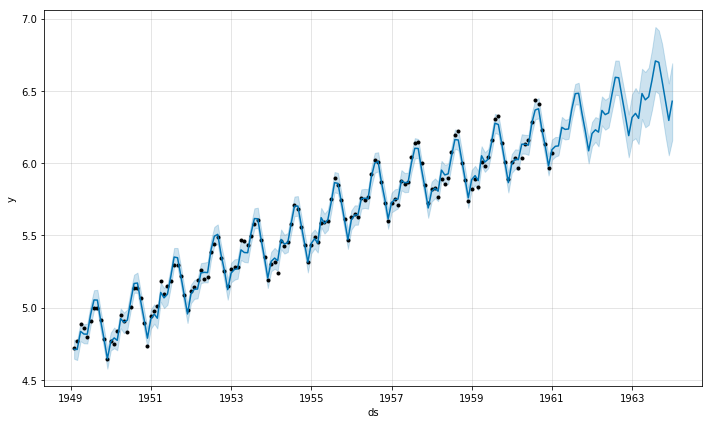

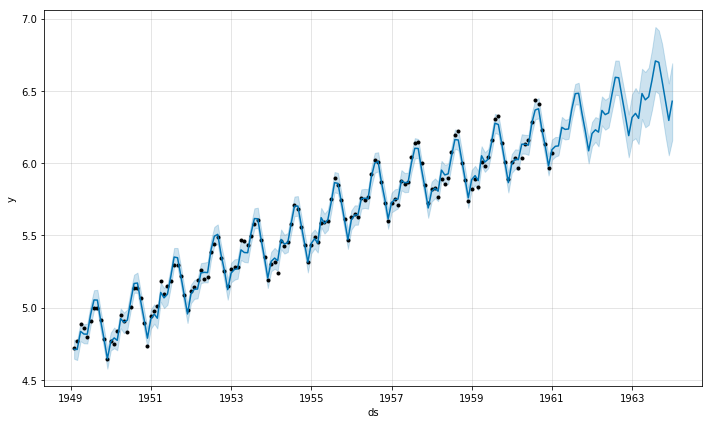

In [67]:
forcast_my=Prophet(interval_width=0.95)
forcast_my.fit(df)
forcast_periods=forcast_my.make_future_dataframe(periods=36,include_history=True,freq='M')
forcast=forcast_my.predict(forcast_periods)
forcast_One=forcast.loc[:,['ds','yhat']]
forcast_One.head()
forcast_my.plot(forcast,uncertainty=True)


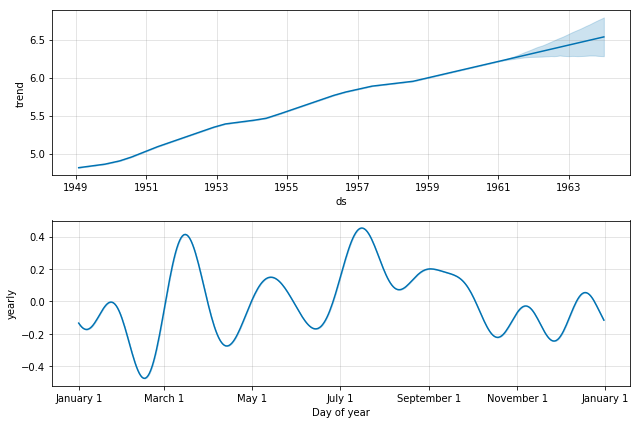

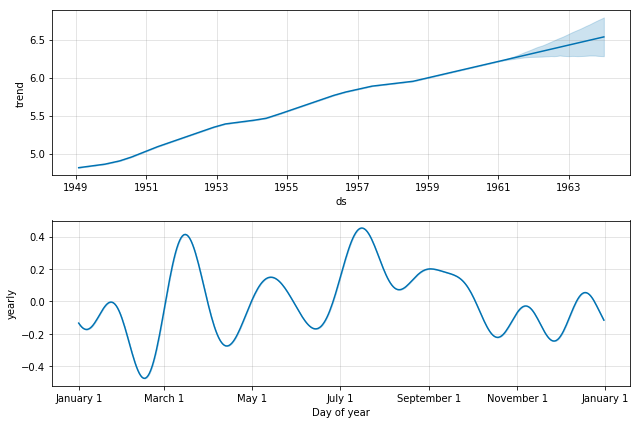

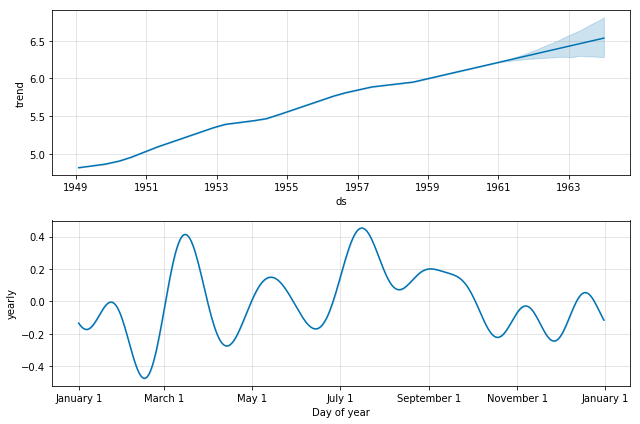

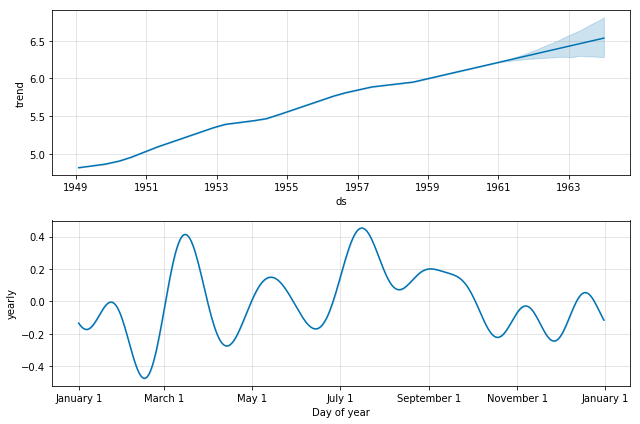

In [68]:
forcast_my.plot_components(forcast)

In [69]:
#forcast_my.plot_components(forcast)
df_final=pd.merge(forcast_One,df,on='ds',how='inner')
df_final.head()

,ds,yhat,month,y,year
0,1949-01-31,4.710721,January,4.718499,1949
1,1949-02-28,4.709836,February,4.770685,1949
2,1949-03-31,4.834695,March,4.882802,1949
3,1949-04-30,4.816443,April,4.859812,1949
4,1949-05-31,4.815402,May,4.795791,1949


,ds,yhat,month,y,year
0,1949-01-31,4.710721,January,4.718499,1949
1,1949-02-28,4.709836,February,4.770685,1949
2,1949-03-31,4.834695,March,4.882802,1949
3,1949-04-30,4.816443,April,4.859812,1949
4,1949-05-31,4.815402,May,4.795791,1949


In [70]:
df_final.yhat=np.e**(df_final.yhat)
df_final.y=np.e**(df_final.y)
df_final.head()

,ds,yhat,month,y,year
0,1949-01-31,111.132216,January,112.0,1949
1,1949-02-28,111.033940,February,118.0,1949
2,1949-03-31,125.800197,March,132.0,1949
3,1949-04-30,123.524950,April,129.0,1949
4,1949-05-31,123.396403,May,121.0,1949


,ds,yhat,month,y,year
0,1949-01-31,111.132216,January,112.0,1949
1,1949-02-28,111.033940,February,118.0,1949
2,1949-03-31,125.800197,March,132.0,1949
3,1949-04-30,123.524950,April,129.0,1949
4,1949-05-31,123.396403,May,121.0,1949


In [71]:
np.round(metrics.mean_absolute_error(df_final.yhat,df_final.y),0)

7.0

7.0

In [72]:
df_final.info()
df_final.describe()
df_final.head()
df_final.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 5 columns):
ds       144 non-null datetime64[ns]
yhat     144 non-null float64
month    144 non-null category
y        144 non-null float64
year     144 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(1)
memory usage: 6.2 KB


,yhat,y,year
count,144.000000,144.000000,144.000000
mean,279.881101,280.298611,1954.500000
std,117.580538,119.966317,3.464102
min,104.053592,104.000000,1949.000000
25%,182.979554,180.000000,1951.750000
50%,267.849587,265.500000,1954.500000
75%,363.552677,360.500000,1957.250000
max,587.332969,622.000000,1960.000000


,ds,yhat,month,y,year
0,1949-01-31,111.132216,January,112.0,1949
1,1949-02-28,111.033940,February,118.0,1949
2,1949-03-31,125.800197,March,132.0,1949
3,1949-04-30,123.524950,April,129.0,1949
4,1949-05-31,123.396403,May,121.0,1949


,ds,yhat,month,y,year
139,1960-08-31,587.332969,August,606.0,1960
140,1960-09-30,509.507243,September,508.0,1960
141,1960-10-31,452.975816,October,461.0,1960
142,1960-11-30,395.291502,November,390.0,1960
143,1960-12-31,442.624606,December,432.0,1960


<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 5 columns):
ds       144 non-null datetime64[ns]
yhat     144 non-null float64
month    144 non-null category
y        144 non-null float64
year     144 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(1)
memory usage: 6.2 KB


,yhat,y,year
count,144.000000,144.000000,144.000000
mean,279.881101,280.298611,1954.500000
std,117.580538,119.966317,3.464102
min,104.053592,104.000000,1949.000000
25%,182.979554,180.000000,1951.750000
50%,267.849587,265.500000,1954.500000
75%,363.552677,360.500000,1957.250000
max,587.332969,622.000000,1960.000000


,ds,yhat,month,y,year
0,1949-01-31,111.132216,January,112.0,1949
1,1949-02-28,111.033940,February,118.0,1949
2,1949-03-31,125.800197,March,132.0,1949
3,1949-04-30,123.524950,April,129.0,1949
4,1949-05-31,123.396403,May,121.0,1949


,ds,yhat,month,y,year
139,1960-08-31,587.332969,August,606.0,1960
140,1960-09-30,509.507243,September,508.0,1960
141,1960-10-31,452.975816,October,461.0,1960
142,1960-11-30,395.291502,November,390.0,1960
143,1960-12-31,442.624606,December,432.0,1960


**Generate For cast Value for next 24 month**

In [73]:
forcast_two=forcast.loc[144:,['ds','yhat','yhat_lower','yhat_upper']]
forcast_two.head()
forcast_two.yhat=np.e**(forcast_two.yhat)
forcast_two.yhat_lower=np.e**(forcast_two.yhat_lower)
forcast_two.yhat_upper=np.e**(forcast_two.yhat_upper)
np.round(forcast_two)

,ds,yhat,yhat_lower,yhat_upper
144,1961-01-31,6.115893,6.052804,6.185149
145,1961-02-28,6.118501,6.049892,6.185674
146,1961-03-31,6.247227,6.177177,6.312775
147,1961-04-30,6.232717,6.171802,6.300204
148,1961-05-31,6.235543,6.168474,6.304400


,ds,yhat,yhat_lower,yhat_upper
144,1961-01-31,453.0,425.0,485.0
145,1961-02-28,454.0,424.0,486.0
146,1961-03-31,517.0,482.0,552.0
147,1961-04-30,509.0,479.0,545.0
148,1961-05-31,511.0,477.0,547.0
149,1961-06-30,586.0,547.0,629.0
150,1961-07-31,652.0,610.0,699.0
151,1961-08-31,654.0,606.0,706.0
152,1961-09-30,570.0,530.0,612.0
153,1961-10-31,503.0,466.0,546.0


,ds,yhat,yhat_lower,yhat_upper
144,1961-01-31,6.115893,6.044195,6.180803
145,1961-02-28,6.118501,6.053047,6.178977
146,1961-03-31,6.247227,6.175758,6.319195
147,1961-04-30,6.232717,6.162799,6.299164
148,1961-05-31,6.235543,6.167325,6.305223


,ds,yhat,yhat_lower,yhat_upper
144,1961-01-31,453.0,422.0,483.0
145,1961-02-28,454.0,425.0,482.0
146,1961-03-31,517.0,481.0,555.0
147,1961-04-30,509.0,475.0,544.0
148,1961-05-31,511.0,477.0,547.0
149,1961-06-30,586.0,546.0,627.0
150,1961-07-31,652.0,605.0,697.0
151,1961-08-31,654.0,605.0,703.0
152,1961-09-30,570.0,527.0,612.0
153,1961-10-31,503.0,463.0,542.0


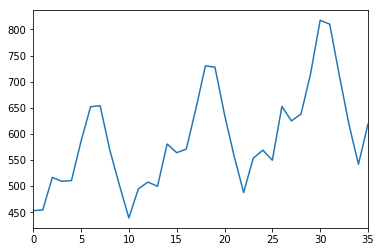

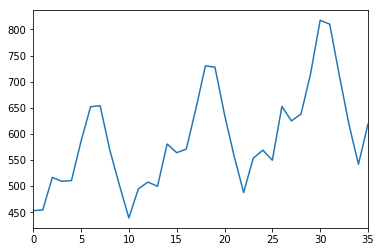

In [74]:
sns.tsplot(forcast_two.yhat)
plt.show()